<a href="https://colab.research.google.com/github/Viny2030/NLP/blob/main/Network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las redes, también llamadas grafos, son una de las partes más interesantes de la ciencia de datos, y el interés en ellas ha crecido exponencialmente en los últimos años. Es muy útil poder modelar la relación entre los puntos de datos. Este módulo explica algunas ideas básicas de la ciencia de redes y muestra cómo hacer análisis de redes en Python utilizando el paquete networkx, que es la forma más popular de hacer análisis de redes en Python.

Lección 1: ¿Por qué analizar redes?
Una red, también llamada "grafo", es un grupo de "nodos" y "bordes" que nos permite mostrar cómo están conectados los nodos. La ciencia de redes se ha vuelto muy popular en los últimos años porque se puede utilizar de muchas formas diferentes.

Dado que las redes sociales han crecido tan rápidamente, el análisis de redes sociales es un caso de uso común. De esto es de lo que hablaremos aquí. Las redes también se pueden utilizar para modelar pandemias y sistemas biológicos. La capacidad de modelar cómo trabajan juntos los agentes se puede utilizar de muchas formas diferentes. Es por eso que debemos aprender a analizar redes.


In [2]:
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

Python version 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
networkx version: 3.4.2


In [4]:
#Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

In [5]:
#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

In [6]:

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph,'club')

In [ ]:
print({key:club_labels[key] for key in [ ]  })

In [7]:
print({key:club_labels[key] for key in range(10,16)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


In [11]:
import numpy as np

In [13]:
import numpy as np
import networkx as nx

In [14]:
# Instead of using to_numpy_matrix, use to_numpy_array
A = nx.to_numpy_array(ZKC_graph)
# or
# A = nx.convert_matrix.to_numpy_array(ZKC_graph)

A

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

In [15]:
#To plot using networkx we first need to get the positions we want for each node.
#Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(ZKC_graph)

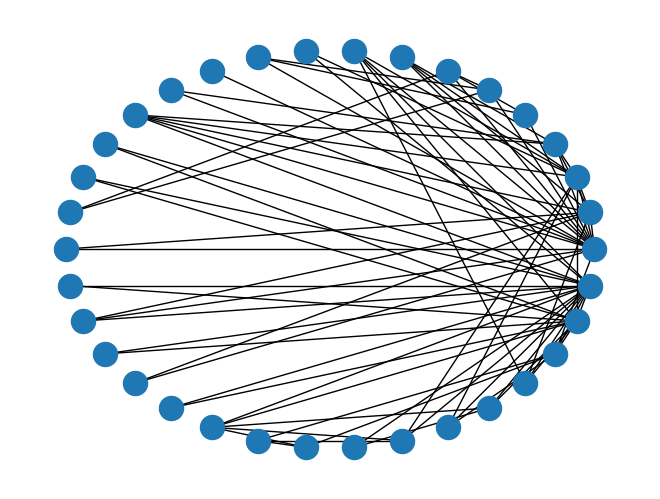

In [16]:
#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph,circ_pos)

In [17]:
density = nx.density(ZKC_graph)
print(f"The density of the ZKC graph is {density}")

The density of the ZKC graph is 0.13903743315508021


In [18]:
degree = ZKC_graph.degree()
print(degree)

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [19]:
degree = ZKC_graph.degree()
degree_list = []
for (n,d) in degree:
  degree_list.append(d)

In [20]:
av_degree = np.mean(degree_list)
print(f"The average degree of the ZKC graph is {av_degree}")

The average degree of the ZKC graph is 4.588235294117647


In [21]:
av_degree = sum(degree_list) / len(degree_list)
print(f"The average degree of the ZKC graph is {av_degree}")

The average degree of the ZKC graph is 4.588235294117647


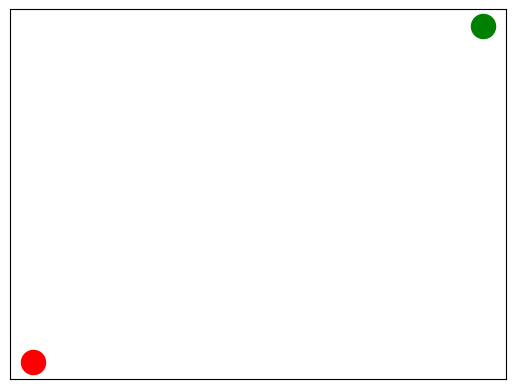

In [22]:
#let's highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [23]:
density = nx.density(ZKC_graph)
print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


In [24]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

In [25]:
degree_list = []

for (n,d) in degree:
    degree_list.append(d)

In [26]:
av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

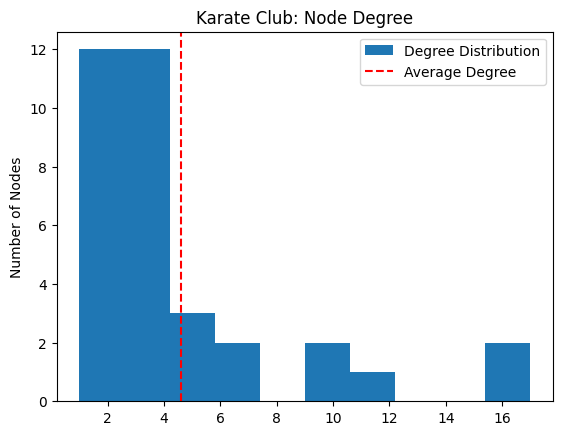

In [27]:
#we now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

In [28]:
#Now we can compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

In [29]:
#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

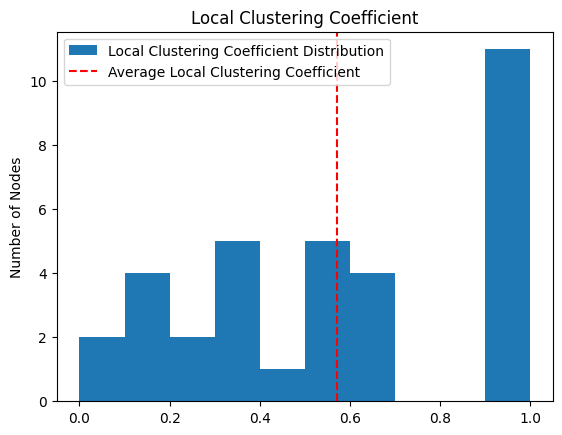

In [30]:
#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

In [31]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(ZKC_graph))

In [32]:
#Let's find out how many communities we detected
print(len(c))
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

3


[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


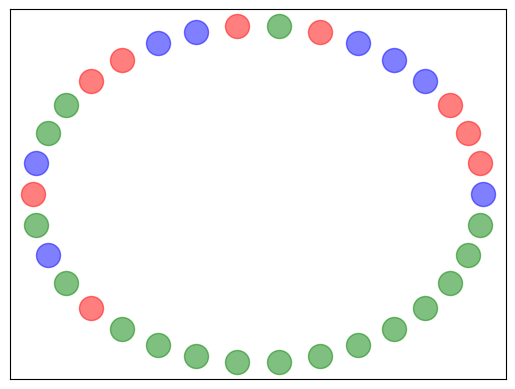

In [33]:
print(community_0)
print(community_1)
print(community_2)
#draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

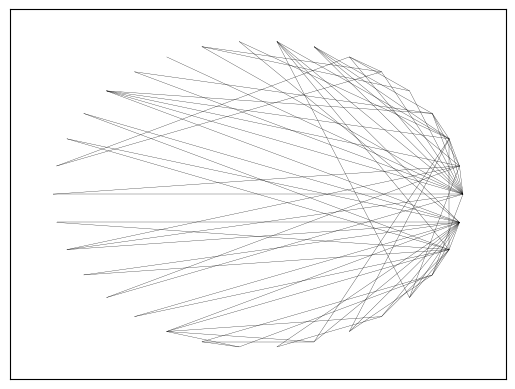

In [34]:
#now we can add edges to the drawing
nx.draw_networkx_edges(ZKC_graph,circ_pos,width = 0.2)

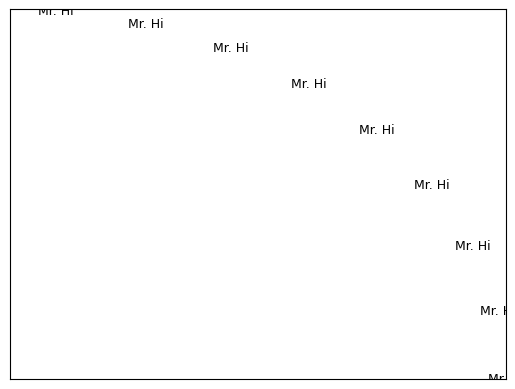

In [35]:
#finally we can add labels to each node corresponding to the final club each member joined
nx.draw_networkx_labels(ZKC_graph,circ_pos,club_labels,font_size=9)

plt.show()

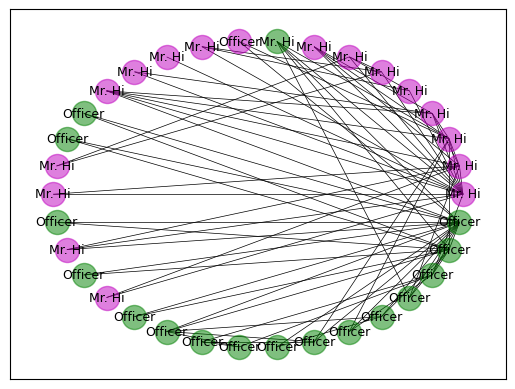

In [38]:
#draw the network as before
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
# Assuming combined_community should be the combination of community_1 and community_2
combined_community = community_1 + community_2  # Define combined_community here
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos,width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()